<center><b><h1> &nbsp; &nbsp; ECEN - Data Mining and Analysis Project
 </h1><b></center>
<center><b><h1>   &nbsp; &nbsp; Fashion MNIST </h1><b></center>


In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn as sk
from PIL import Image as im
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# Data Preparation

In [2]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

In [3]:
# load train and test data
train_data = pd.read_csv(parent_directory + "/Data/fashion-mnist_train.csv")
test_data = pd.read_csv(parent_directory + "/Data/fashion-mnist_test.csv")

In [4]:
# check size of data
print("Shape of Train data: ", train_data.shape)
print("Shape of Test data: ", test_data.shape)

Shape of Train data:  (60000, 785)
Shape of Test data:  (10000, 785)


## Data Cleaning

In [5]:
# to check valid pixel range
features = train_data.drop(['label'],axis=1).values
sum(sum(features>255)!=0)

0

In [6]:
sum(train_data.isnull().sum())

0

In [7]:
sum(test_data.isnull().sum())

0

In [8]:
train_data.duplicated().sum()

43

# **Exploratory Data Analysis**

### Descriptive statistics

> #### Class Distribution

In [9]:
# Class Distributions on training set:
class_distribution_train = train_data['label'].value_counts()

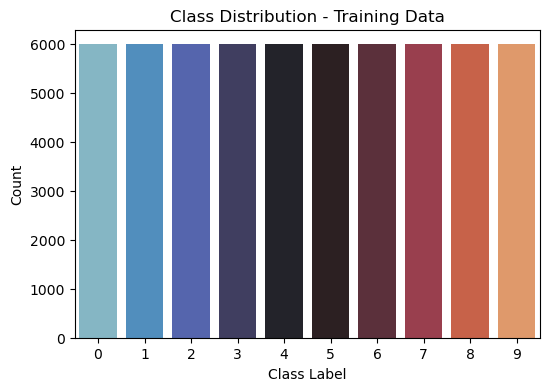

In [10]:
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution_train.index, y=class_distribution_train.values,palette='icefire')
plt.title('Class Distribution - Training Data')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

In [11]:
# Class Distributions on testing set:
class_distribution_test = test_data['label'].value_counts()


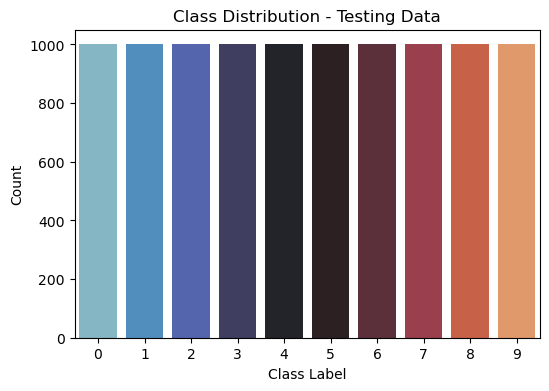

In [12]:
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution_test.index, y=class_distribution_test.values,palette='icefire')
plt.title('Class Distribution - Testing Data')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

> #### Data Statistics

In [13]:
pixel_stats = train_data.iloc[:, 1:].describe()
pixel_stats

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


# Data Visualization

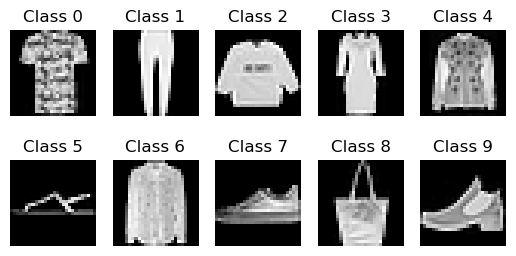

In [14]:
unique_labels = np.unique(train_data['label'])
for i, label in enumerate(unique_labels):
    sample_image = train_data[train_data['label'] == label].iloc[0, 1:].values.reshape(28, 28)
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_image, cmap='gray')
    plt.title(f'Class {label}')
    plt.axis('off')

plt.show()

### TSNE

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(train_data.iloc[:, 1:])

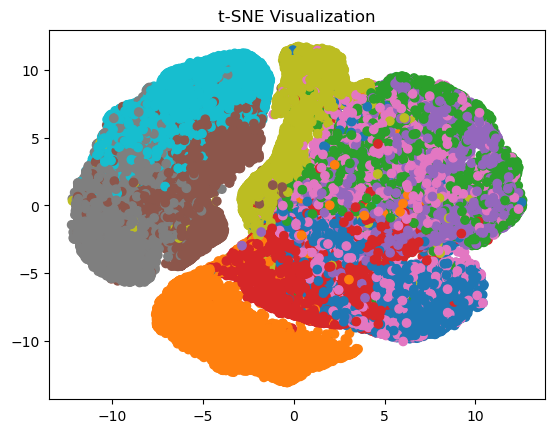

In [16]:
tsne_result.shape
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=train_data['label'], cmap='tab10')
plt.title('t-SNE Visualization')
plt.show()

# Data Split into train, validation and test

In [17]:
train_Y = train_data["label"].values
train_X = train_data.drop(labels = ["label"], axis = 1)

In [18]:
test_Y = test_data["label"].values
test_X = test_data.drop(labels = ["label"], axis = 1)

In [19]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size = 0.1, random_state = 2)

# Data Transformation

In [20]:
#Standardizing the data 
train_X = train_X / 255.0
test_X = test_X / 255.0
val_X = val_X / 255.0

print("Training Data", train_X.shape)
print("Validation Data", val_X.shape)
print("Test Data", test_X.shape)

Training Data (54000, 784)
Validation Data (6000, 784)
Test Data (10000, 784)


# Dimensionality Reduction



In [21]:

def pca_data(data,info_pres):
    cov_matrix = np.cov(data, rowvar=False)

    # Computing the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sorting eigenvalues in descending order
    eigenvalue_index = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_index]
    eigenvectors = eigenvectors[:, eigenvalue_index]

    explained_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

    n_components = np.argmax(explained_variance >= info_pres) + 1

    pca = PCA(n_components=n_components)
    pca.fit(data)
    return pca

In [22]:
#Preserving 90% of information

pca=pca_data(train_X,0.90)

In [23]:
train_pca = pca.transform(train_X)
print("Train shape",train_pca.shape)

val_pca = pca.transform(val_X)
print("Validation shape",val_pca.shape)

test_pca = pca.transform(test_X)
print("Test shape",test_pca.shape)

Train shape (54000, 84)
Validation shape (6000, 84)
Test shape (10000, 84)


# Model Selection


> In the journey of model selection, we embarked on training various algorithms like Random Forest, CNN, Decision Tree, and K Neighbors. As we navigated through, the Convolutional Neural Network (CNN) emerged as the standout performer in accuracy. Our focus shifted towards refining this CNN model through meticulous hyperparameter tuning, recognizing its potential to yield the most promising results among all models explored.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [25]:
clf = RandomForestClassifier()
clf.fit(train_pca, train_Y)
val_predictions = clf.predict(val_pca)
accuracy = accuracy_score(val_Y, val_predictions)
print(f"Accuracy on the Validation data (Random Forest): {accuracy * 100:.2f}%")

clf = DecisionTreeClassifier()
clf.fit(train_pca, train_Y)
val_predictions = clf.predict(val_pca)
accuracy = accuracy_score(val_Y, val_predictions)
print(f"Accuracy on the Validation data (Decision Tree): {accuracy * 100:.2f}%")

clf = KNeighborsClassifier()
clf.fit(train_pca, train_Y)
val_predictions = clf.predict(val_pca)
accuracy = accuracy_score(val_Y, val_predictions)
print(f"Accuracy on the Validation data (KNeighborsClassifier): {accuracy * 100:.2f}%")

svm_clf = SVC(kernel='rbf', C=10, gamma='auto')
svm_clf.fit(train_pca, train_Y)
val_predictions_svm = svm_clf.predict(val_pca)
accuracy_svm = accuracy_score(val_Y, val_predictions_svm)
print(f"Accuracy on the validation data (SVM): {accuracy_svm * 100:.2f}%")

Accuracy on the Validation data (Random Forest): 86.97%
Accuracy on the Validation data (Decision Tree): 76.92%
Accuracy on the Validation data (KNeighborsClassifier): 86.03%
Accuracy on the validation data (SVM): 90.18%


#### Training CNN

In [26]:
train_X_cnn = train_X.values.reshape(-1,28,28,1)
test_X_cnn = test_X.values.reshape(-1,28,28,1)
val_X_cnn = val_X.values.reshape(-1,28,28,1)


print('Training Data Shape :', train_X_cnn.shape)
print('Validation Data Shape :', val_X_cnn.shape)
print('Testing Data Shape :', test_X_cnn.shape)


Training Data Shape : (54000, 28, 28, 1)
Validation Data Shape : (6000, 28, 28, 1)
Testing Data Shape : (10000, 28, 28, 1)


In [27]:
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [28]:
def model_cnn(filters_layer1, filters_layer2, filters_layer3, kernel_size):
  # Model
    model = Sequential()
  # Adding convolution 2D
    model.add(Conv2D(filters_layer1, kernel_size=kernel_size,
                  activation='relu',
                  kernel_initializer='he_normal',
                  input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(filters_layer2,
                  kernel_size=kernel_size,
                  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters_layer3, kernel_size, activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))


    model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                optimizer='adam',
                metrics=['accuracy'])
    return model

In [29]:
model = model_cnn(32, 64, 128, (3,3))

In [30]:
epochs = 5
batch_size = 128

In [31]:
train_model = model.fit(train_X_cnn, train_Y,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(val_X_cnn, val_Y))

Epoch 1/5
422/422 [==============================] - 11s 26ms/step - loss: 0.5187 - accuracy: 0.8125 - val_loss: 0.3675 - val_accuracy: 0.8682
Epoch 2/5
422/422 [==============================] - 10s 25ms/step - loss: 0.3336 - accuracy: 0.8791 - val_loss: 0.3344 - val_accuracy: 0.8810
Epoch 3/5
422/422 [==============================] - 11s 25ms/step - loss: 0.2863 - accuracy: 0.8956 - val_loss: 0.2887 - val_accuracy: 0.8965
Epoch 4/5
422/422 [==============================] - 10s 24ms/step - loss: 0.2533 - accuracy: 0.9074 - val_loss: 0.2600 - val_accuracy: 0.9070
Epoch 5/5
422/422 [==============================] - 10s 25ms/step - loss: 0.2271 - accuracy: 0.9169 - val_loss: 0.2633 - val_accuracy: 0.9032


## Hyperparameter Tuning of CNN

In [32]:
from tqdm import tqdm

In [33]:
param_grid ={
    "filters_layer1" : [16, 32, 64],
    "filters_layer2" : [32,64,128],
   "filters_layer3" : [64,128,256],
    "kernel_size" : [(2,2),(3,3)]
}

import itertools as it

allNames = sorted(param_grid)
combinations = it.product(*(param_grid[Name] for Name in allNames))
comb = list(combinations)

In [34]:
results = []
best_accuracy = 0

In [35]:
# The execution of the following code segment may take around 2 to 3 hours to complete. 
# I have stored the computed results in the 'results.pkl' file for reference. 
# The printed output from the precomputed results is provided to avoid running this code block.

for c in tqdm(comb):
    filters_layer1 = c[0]
    filters_layer2 = c[1]a
    filters_layer3 = c[2]
    kernel_size= c[3]
    model= model_cnn(filters_layer1,filters_layer2,filters_layer3,kernel_size)

    train_model = model.fit(train_X_cnn, train_Y,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=0,
                  validation_data=(val_X_cnn, val_Y))

    score = model.evaluate(val_X_cnn, val_Y, verbose=0)

    dic = {
      "filters_layer1" : filters_layer1,
      "filters_layer2" : filters_layer2,
      "filters_layer3" : filters_layer3,
      "kernel_size" : kernel_size,
      "accuracy" : score[1]
  }

    results.append(dic)

    if score[1]>best_accuracy:
        best_filters_layer1 = filters_layer1
        best_filters_layer2 = filters_layer2
        best_filters_layer3 = filters_layer3
        best_kernel_size = kernel_size
        best_accuracy = score[1]

In [36]:
print("Best filters layer 1: ", best_filters_layer1)
print("Best filters layer 2: ",best_filters_layer2)
print("Best_filters_layer 3: ",best_filters_layer3 )
print("Best_kernel_size: ",best_kernel_size )
print("Best_accuracy: ", best_accuracy)

In [37]:
import pickle

with open("results.pkl", "wb") as pickle_file:
    pickle.dump(results, pickle_file)

# The output has been stored in the file named results.pkl

In [38]:
import pickle

with open("results.pkl", 'rb') as file:
    data = pickle.load(file)

In [39]:
# Retrieving the best parameters stored in the file named results.pkl
best_acc=0
for dic in data:
    if dic["accuracy"]> best_acc:
        best_acc = dic["accuracy"]

        best_filters_layer1 = dic["filters_layer1"]
        best_filters_layer2 = dic["filters_layer2"]
        best_filters_layer3 = dic["filters_layer3"]
        best_kernel_size = dic["kernel_size"]

In [40]:
print("best filters layer 1: ",best_filters_layer1)
print("best filters layer 2: ",best_filters_layer2)
print("best filters layer 3: ",best_filters_layer3)
print("best kernel size: ",best_kernel_size)

best filters layer 1:  64
best filters layer 2:  128
best filters layer 3:  256
best kernel size:  (3, 3)


# Model Evaluation with Tuned Parameters

In [41]:
model = model_cnn(64, 128, 256, (3,3))
epochs = 30
batch_size = 128

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_model = model.fit(train_X_cnn, train_Y,
                  batch_size=batch_size,
                  epochs=epochs,
                  callbacks=[early_stopping],
                  verbose=1,
                  validation_data=(val_X_cnn, val_Y))

Epoch 1/30
422/422 [==============================] - 29s 68ms/step - loss: 0.4759 - accuracy: 0.8264 - val_loss: 0.3660 - val_accuracy: 0.8695
Epoch 2/30
422/422 [==============================] - 29s 68ms/step - loss: 0.3023 - accuracy: 0.8914 - val_loss: 0.2972 - val_accuracy: 0.8958
Epoch 3/30
422/422 [==============================] - 29s 68ms/step - loss: 0.2529 - accuracy: 0.9075 - val_loss: 0.2601 - val_accuracy: 0.9052
Epoch 4/30
422/422 [==============================] - 29s 69ms/step - loss: 0.2150 - accuracy: 0.9222 - val_loss: 0.2499 - val_accuracy: 0.9080
Epoch 5/30
422/422 [==============================] - 33s 78ms/step - loss: 0.1845 - accuracy: 0.9319 - val_loss: 0.2407 - val_accuracy: 0.9128
Epoch 6/30
422/422 [==============================] - 30s 72ms/step - loss: 0.1589 - accuracy: 0.9417 - val_loss: 0.2295 - val_accuracy: 0.9195
Epoch 7/30
422/422 [==============================] - 28s 66ms/step - loss: 0.1373 - accuracy: 0.9494 - val_loss: 0.2445 - val_accuracy:

In [43]:
model.evaluate(val_X_cnn,val_Y)

188/188 [==============================] - 1s 6ms/step - loss: 0.2295 - accuracy: 0.9195


[0.2295488864183426, 0.9194999933242798]

In [44]:
model.save_weights("weights.h5")

In [45]:
loaded_model = model_cnn(64, 128, 256, (3,3))

In [46]:
loaded_model.load_weights("weights.h5")

In [47]:
loaded_model.evaluate(val_X_cnn,val_Y)

188/188 [==============================] - 1s 5ms/step - loss: 0.2295 - accuracy: 0.9195


[0.2295488864183426, 0.9194999933242798]

In [48]:
score = model.evaluate(test_X_cnn, test_Y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.2285 - accuracy: 0.9207
Test loss: 0.2284538596868515
Test accuracy: 0.9207000136375427


In [49]:
#get the predictions for the test data
test_predicted_classes = model.predict(test_X_cnn)

313/313 [==============================] - 2s 5ms/step


In [50]:
p = np.argmax(test_predicted_classes[:10000],axis=1)
y = test_Y
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]


In [51]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9207
Incorrect predicted classes: 793


In [52]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(10)]
predicted_classes=np.argmax(test_predicted_classes, axis=1)
print(classification_report(test_Y, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.84      0.92      0.88      1000
    Class 1 (Trouser) :       0.98      0.99      0.99      1000
   Class 2 (Pullover) :       0.89      0.88      0.88      1000
      Class 3 (Dress) :       0.93      0.93      0.93      1000
       Class 4 (Coat) :       0.85      0.91      0.88      1000
     Class 5 (Sandal) :       0.99      0.97      0.98      1000
      Class 6 (Shirt) :       0.83      0.70      0.76      1000
    Class 7 (Sneaker) :       0.95      0.96      0.96      1000
        Class 8 (Bag) :       0.99      0.98      0.99      1000
 Class 9 (Ankle Boot) :       0.95      0.97      0.96      1000

               accuracy                           0.92     10000
              macro avg       0.92      0.92      0.92     10000
           weighted avg       0.92      0.92      0.92     10000



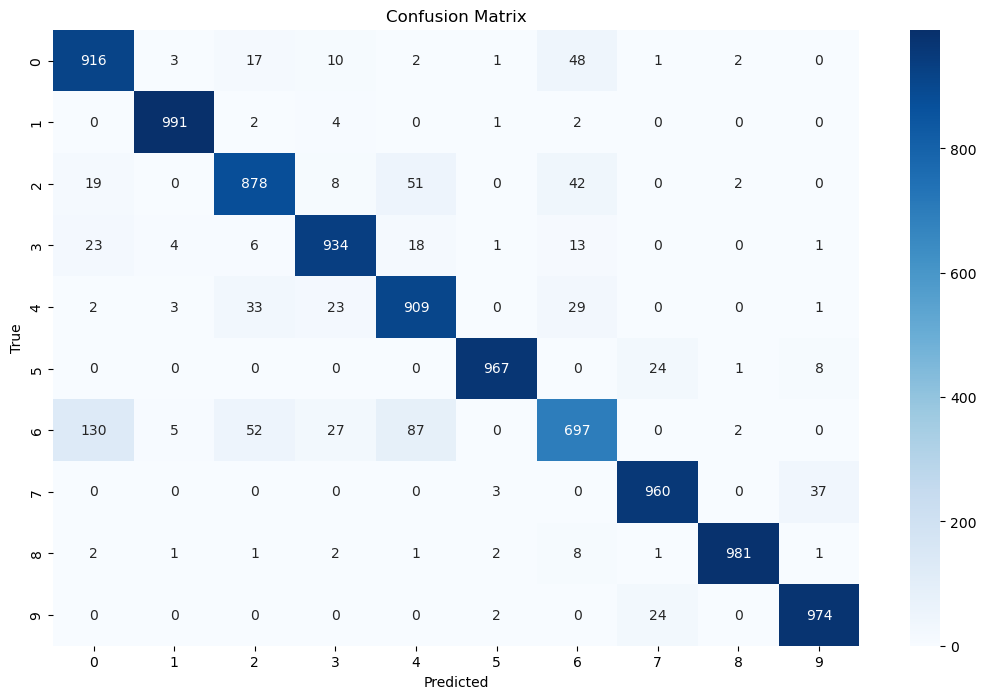

In [53]:
cm = confusion_matrix(test_Y, p)

plt.figure(figsize=(13, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Model interpretablity

In [54]:
import tensorflow as tf
def generate_grad_cam(model, last_conv_layer_name, image, class_index):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(image)
        class_output = predictions[:, class_index]

    grads = tape.gradient(class_output, conv_output)
    pooled_grads = tf.reduce_mean(tf.nn.relu(grads), axis=(0, 1, 2))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_output), axis=-1)

    heatmap /= np.max(heatmap)

    return heatmap

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 flatten_1 (Flatten)         (None, 2304)             

1/1 [==============================] - 0s 7ms/step


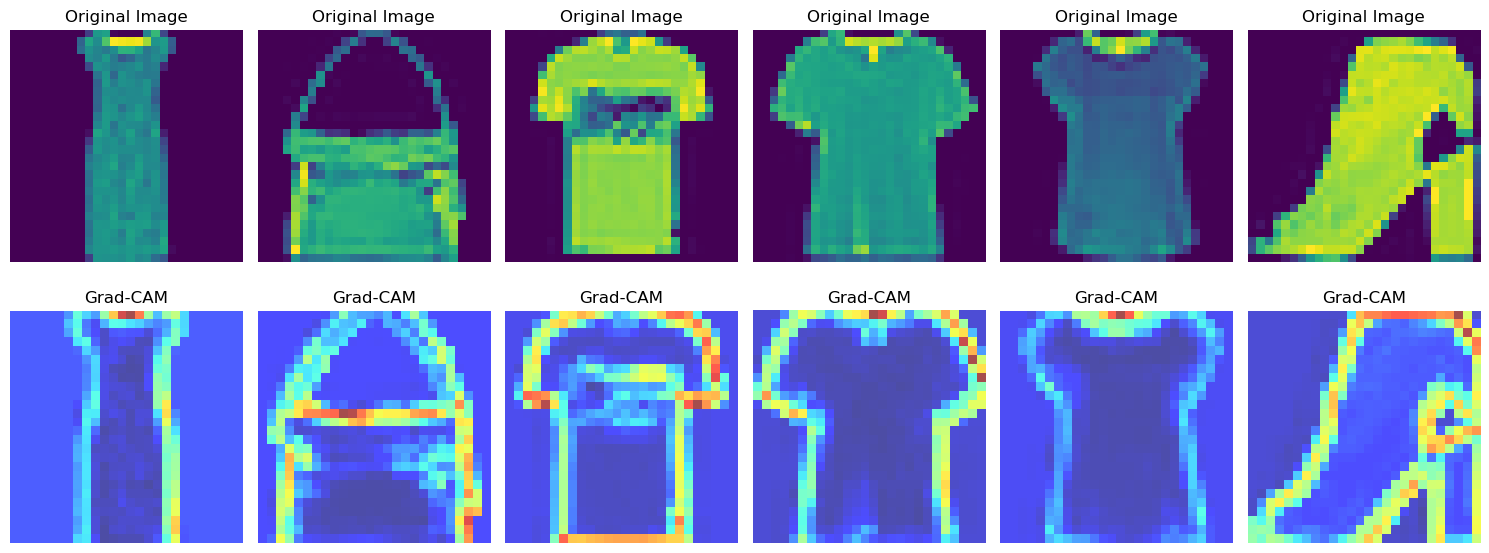

In [56]:
images =  val_X_cnn[40:46]
fig, axs = plt.subplots(2, 6, figsize=(15, 6))
last_conv_layer = 'conv2d_3'

for i in range(6):
    axs[0, i].imshow(images[i])
    axs[0, i].set_title("Original Image")
    axs[0, i].axis('off')

    axs[1, i].imshow(generate_grad_cam(model, last_conv_layer, images[i].reshape(1,28,28,1), np.argmax(model.predict(images[i].reshape(1,28,28,1)))), cmap='jet', alpha=0.7) 
    axs[1, i].set_title("Grad-CAM")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

> In the provided image above, the Grad-CAM heatmap illustrates the regions contributing significantly to the model's classification decision. These visualizations are instrumental in explaining the CNN's behavior, providing valuable insights into its inner workings.